# Regression Basics

# 載入常用程式庫及常數定義

In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google 雲端硬碟 (andrewhuang723@gmail.com)/adventures/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'regression/'
data_dir = groot_dir + 'regression/'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

EX1DATA = '147xBeCECYur0FxDyly-oG2BqsqEH2Mxm'
EX1DATA2 = '101qw-9OkjCxwuSkBJUBaGURRWpZbFKOe'
EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'
ADVER = '1xFMcCuiMgX9VnelDtbyyV9rXBMFerx8k'
TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...') 
print('\nLibraries and dependenciess imported')
print_local_now()


Running on win32
Python Version 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Data storage points to ==> C:\Users\wonglab/Google 雲端硬碟 (andrewhuang723@gmail.com)/adventures/regression/

This module is amied to leran regression basics...

Libraries and dependenciess imported
Local Time: 2021-07-03 11:53:40.488136


# 練習資料從哪裏來？

- [UCI regression datasets](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
- [sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
    - [sklearn: make_gression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)

## make_regression

- [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression)

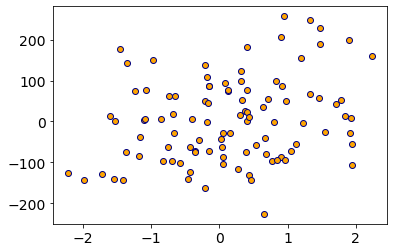

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X, y = make_regression(n_samples = 100, n_features = 2, 
    bias = 0.2, noise = 0.2, random_state = 0)

#fig,ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 0], y, color = 'orange', edgecolor = 'navy')

## create dataset on your own

- [numpy rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html?highlight=rand#numpy.random.rand)
- [numpy randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy.random.randn)

(100, 1)


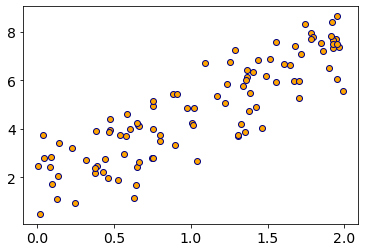

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)  # range[0..2]
y = 1.6 + 3 * X + np.random.randn(100, 1)

X_new = np.array([[0], [2]])

# print(X_new)
# fig,ax = plt.subplots(figsize=(12, 8))
plt.scatter(X,y, color = 'orange', edgecolor = 'navy')
print(X.shape)

## sklearn load_data() utilities

- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
- [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data["data"], data["target"]

print(X.shape, y.shape)

(506, 13) (506,)


In [ ]:
# plt.scatter(X[:, 3], y)

## Data used in keynote

In [ ]:
from scipy.io import loadmat
import statsmodels.api as sm

simple_x = np.array([2,9,5,5,3,7,1,8,6,2],dtype=np.float64)
simple_y = np.array([69,98,82,77,71,84,55,94,84,64],dtype=np.float64)

#
# for polynomial regression
#
poly_x = np.array([2, 9, 5, 5, 3, 7, 1, 8, 6, 2 ], dtype = np.float64)
poly_y = np.array([69, 92, 82, 72, 71, 84, 40, 94, 88, 59], dtype = np.float64)

wiki_x = np.array([1.47, 1.50, 1.52,1.55, 1.57, 
              1.60, 1.63, 1.65, 1.68, 1.70, 
              1.73, 1.75, 1.78, 1.80, 1.83 ], dtype = np.float64)
wiki_y = np.array([52.21, 53.12, 54.48, 55.84, 57.20,
             58.57, 59.93, 61.29, 63.11, 64.47, 
             66.28, 68.1, 69.92, 72.19, 74.46], 
            dtype = np.float64)

# EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'

fetch_gdrive_file(EX5DATA, os.path.join(data_dir, 'ex5datam1.mat'))
awdata = loadmat( os.path.join(data_dir, 'ex5datam1.mat'))

# # Load from ex5data1.mat, where all variables will be store in a dictionary

# # Extract train, test, validation data from dictionary
# # and also convert y's form 2-D matrix (MATLAB format) to a numpy vector
aw_x, aw_y = np.array(awdata['X']), np.array(awdata['y'])
aw_xtest, aw_ytest = np.array(awdata['Xtest']), np.array(awdata['ytest'])
aw_xval, aw_yval = np.array(awdata['Xval']), np.array(awdata['yval'])

Downloading...
From: https://drive.google.com/uc?id=1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J
To: C:\Users\wonglab\Google 雲端硬碟 (andrewhuang723@gmail.com)\adventures\regression\ex5datam1.mat
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.32k/1.32k [00:00<?, ?B/s]


## Download UCI files

In [ ]:
sample_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

In [ ]:
import zipfile, gzip, shutil

#
# Input: 
#    zip_file   : the compressed file ended with '.zip' or '.gz'
#    extract_to: the directory you want to put uncompressed file
#
#          Note that extract_to must be ended with '/'
#
def ungzip(zip_file, extract_to):
    gzfile = zip_file.split('/')[-1]
    new_name = os.path.join(extract_to, gzfile.split('.')[0])
    print('new name=', new_name)
    with gzip.open(zip_file, 'rb') as f_in:
        with open(new_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

def unzip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        
def my_downloader(remote_url, extrac_to):
    fetch_file_via_requests(remote_url, extrac_to)
    local_name = remote_url.split('/')[-1]
    file_ext = remote_url.split('.')[-1]
    if (file_ext == 'zip'):
        unzip(os.path.join(extrac_to, local_name), data_dir)
    elif (file_ext == 'gz') or (file_ext == 'gzip'):
        ungzip(os.path.join(extrac_to, local_name), data_dir)
 
my_downloader(sample_url, data_dir)
print(f'data downloaded and stored in {data_dir}')

data downloaded and stored in C:\Users\wonglab/Google 雲端硬碟 (andrewhuang723@gmail.com)/adventures/regression/


# 套件 sklearn & statsmodels

## sklearn.linear_model.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(X, y)

print(linr.coef_, linr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.459488385089855


In [ ]:
from sklearn.metrics import r2_score
y_hat = linr.predict(X)
r2 = r2_score(y, y_hat)
r2

0.7406426641094095

## statsmodels ols

- [add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html)
- [OLS](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

In [ ]:
ols = simple_ols(X, y)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        11:57:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# ols.params, ols.rsquared, ols.tvalues, ols.rsquared_adj, ols.resid
ols.predict().shape

(506,)

<font color='darkorange'>convert ols summary into dataframe<font>

In [ ]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[:, 0]
    conf_higher = results.conf_int()[:, 1]

    results_df = pd.DataFrame({"pvals":pvals, "coeff":coeff,
                   "conf_lower":conf_lower, "conf_higher":conf_higher})

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [ ]:
ols_df = results_summary_to_dataframe(ols)
ols_df

,coeff,pvals,conf_lower,conf_higher
0,36.459488,3.283438e-12,26.432226,46.486751
1,-0.108011,1.086810e-03,-0.172584,-0.043438
2,0.046420,7.781097e-04,0.019449,0.073392
3,0.020559,7.382881e-01,-0.100268,0.141385
4,2.686734,1.925030e-03,0.993904,4.379563
5,-17.766611,4.245644e-06,-25.271634,-10.261589
6,3.809865,1.979441e-18,2.988727,4.631004
7,0.000692,9.582293e-01,-0.025262,0.026647
8,-1.475567,6.013491e-13,-1.867455,-1.083679
9,0.306049,5.070529e-06,0.175692,0.436407


## Normal Equation

$\theta = (X^TX)^{-1}(X^Ty)$

In [ ]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance

# X_b = np.append(np.ones((len(X), 1)),X,axis=1) # alternative way to do this

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[1.28335369],
       [3.20473701]])

# 如何畫散佈圖（scatter plot）？

## simple scatter plot

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, bias=0.2, noise=0.2, random_state=42)

X = X[:, 0]

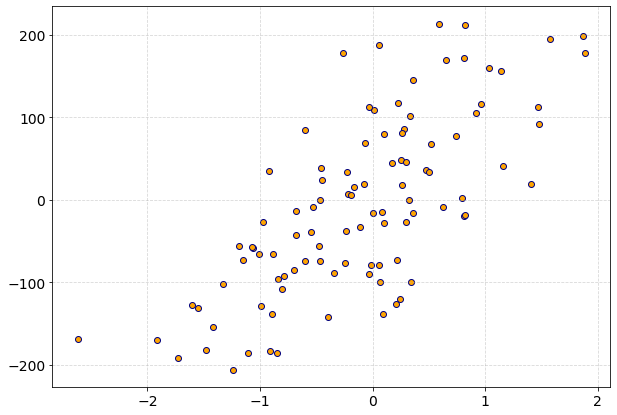

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X, y, color="orange", edgecolors="navy")
ax.grid(b="on", ls="--", alpha=0.5)

output_fig("scatter plot")

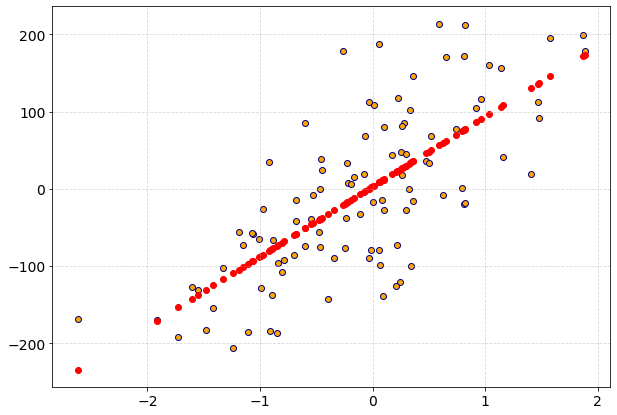

In [ ]:
model = simple_ols(X, y)

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X, y, color="orange", edgecolors="navy")
ax.scatter(X, model.fittedvalues, color="red")
ax.grid(b="on", ls="--", alpha=0.5)

output_fig("scatter plot")

## seaborn regplot 

對matplotlib 進行wrapping 的 package

In [ ]:
fetch_gdrive_file(EX1DATA, os.path.join(data_dir, "ex1data1.txt"))
df = pd.read_csv(os.path.join(data_dir, "ex1data1.txt"), header=None)

Downloading...
From: https://drive.google.com/uc?id=147xBeCECYur0FxDyly-oG2BqsqEH2Mxm
To: /content/drive/My Drive/adventures/regression/ex1data1.txt
100%|██████████| 1.36k/1.36k [00:00<00:00, 1.11MB/s]


In [ ]:
df.columns = ["x", "y"]
df

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


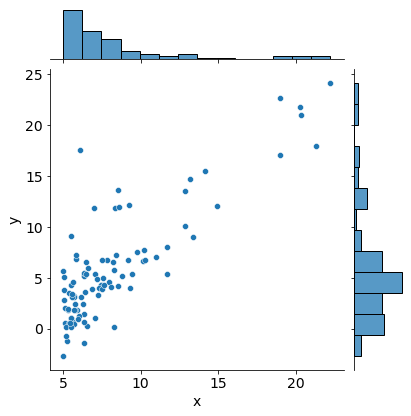

In [ ]:
sns.jointplot(x="x", y="y", data=df)

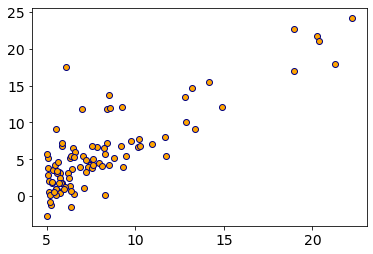

In [ ]:
plt.scatter(df.x, df.y, color='orange', edgecolor='navy')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


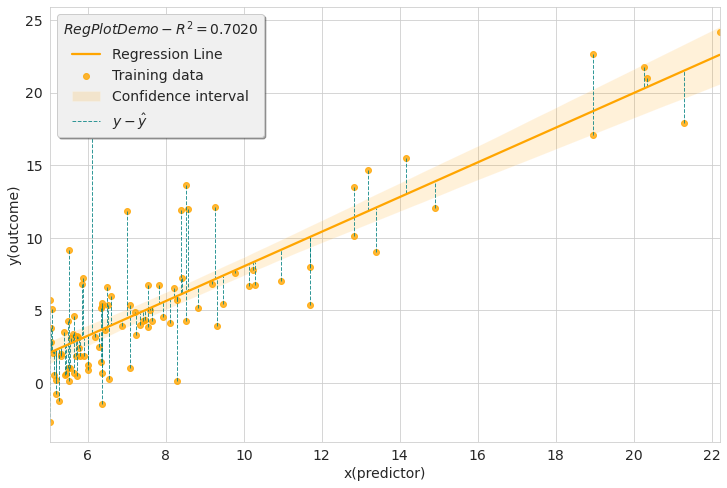

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))

sns.regplot(df.x, df.y, color='orange', ax=ax)

ols = simple_ols(df.x, df.y)
ax.vlines(df.x, df.y, ols.fittedvalues, color="teal", ls="--", lw=1, alpha=0.8)
ax.set_xlabel('x(predictor)')
ax.set_ylabel('y(outcome)')

ax.legend(["Regression Line", "Training data", "Confidence interval", r"$y - \hat y$"],
          loc="upper left", frameon=True, shadow=True, title=r"$RegPlot Demo - R^2=%.4f$" % ols.rsquared,
          facecolor="#f0f0f0")

# 以上是RegPlot中的組成順序
# matplotlib 允許 $LaTex 語法

# Multivariate Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

## CS229 Ex1-2

In [ ]:
fetch_file_via_requests(
    DropboxLink('90gzmvbih77fhnk', 'ex1data2.txt'), data_dir
)

'/content/drive/My Drive/adventures/regression/ex1data2.txt'

In [ ]:
data_doned = os.path.join(data_dir, "ex1data2.txt")
df = pd.read_csv(data_doned, header=None)
df.tail()

,0,1,2
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [ ]:
df.rename(columns={0:"X1", 1:"X2", 2:"y"}, inplace=True)
df.tail()

,X1,X2,y
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


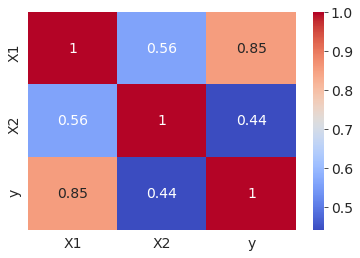

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
        annot=True, cmap="coolwarm", ax=ax)

In [ ]:
#model = simple_ols(df.X1, df.y)

model_tot = simple_ols(df.drop(["y"]), axis=1), df.y)

## load_boston()

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
X, y = data["data"], data["target"]
X.shape, y.shape

((506, 13), (506,))

In [ ]:
df = pd.DataFrame(data=X, columns=data["feature_names"])
#columns names = 有意義
model = simple_ols(df, y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        09:07:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
#對features 標準化
df = pd.DataFrame(data=X, columns=data["feature_names"])
model = simple_ols(df, y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        09:09:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ISLR adver.csv

In [ ]:
fetch_file_via_requests(
    DropboxLink('uev3kektwswh21c', 'adver.csv'), data_dir )

'/content/drive/My Drive/adventures/regression/adver.csv'

In [ ]:
adv_csv = os.path.join(data_dir, "adver.csv")
adf = pd.read_csv(adv_csv, index_col=0)
adf.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


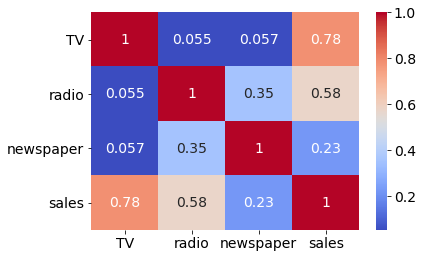

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
corr = adf.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
        annot=True, cmap="coolwarm", ax=ax)

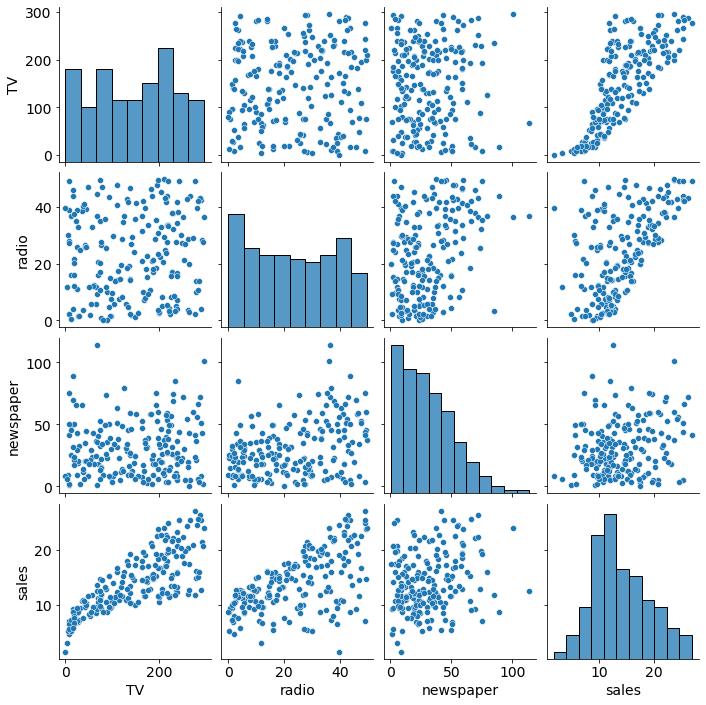

In [ ]:
sns.pairplot(adf)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


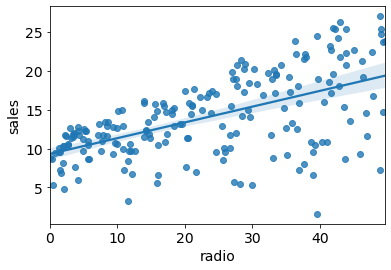

In [ ]:
sns.regplot(adf.radio, adf.sales)

Text(0.5, 29.120000000000033, 'Money spent on medias')

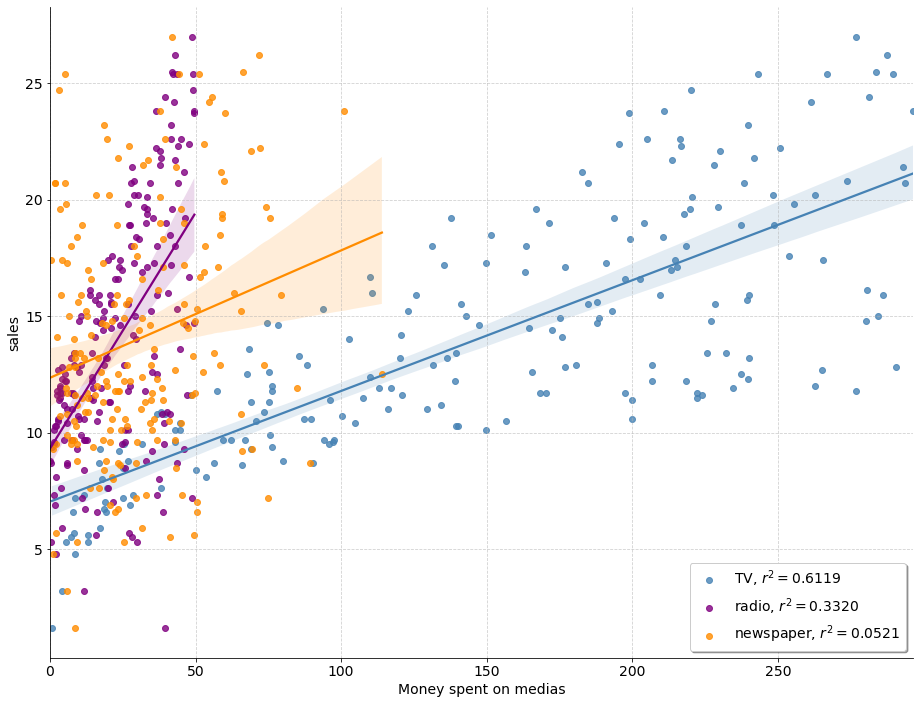

In [ ]:
from sklearn.metrics import r2_score

media = ["TV", "radio", "newspaper"]
mcolors = ["steelblue", "purple", "darkorange"]

g = sns.FacetGrid(adf, height=10, aspect=1.3)

for m, c in zip(media, mcolors):
    ols = simple_ols(adf[m], adf.sales)
    r2 = ols.rsquared
    g.map(sns.regplot, m, "sales", color=c, data=adf, label=m + ", " + r"$r^2=%.4f$" % r2)

plt.legend(loc="best", shadow=True, fontsize=14)
plt.grid(b="on", ls="--", alpha=0.6)
plt.xlabel("Money spent on medias")

In [ ]:
ols_full = simple_ols(adf.drop(["sales"], axis=1), adf.sales)
ols_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        01:47:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ndf = adf.filter(["TV", "radio"], axis=1)
ndf["new"] = adf.TV * adf.radio
ndf.head()

ols_try = simple_ols(ndf, adf.sales)
ols_try.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          6.68e-146
Time:                        01:48:34   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
new            0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

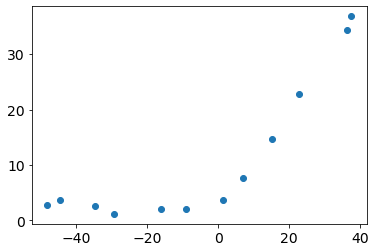

In [ ]:
X, y = aw_x, aw_y
plt.scatter(X, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


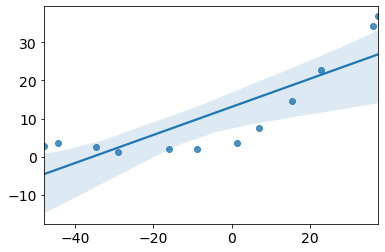

In [ ]:
sns.regplot(X, y)

## polyfit

In [ ]:
def polyfit_wrapper(xvec, yvec, deg=3):
    p = np.polyfit(xvec.flatten(), yvec.flatten(), deg)
    return np.polyval(p, xvec.flatten()), p

## sklearn Polynomail Features()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X)
linear = LinearRegression()
linear.fit(X_train_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score

def PolynomialRegression(X, y, deg=3, xdomain=None):
    model = make_pipeline(
        PolynomialFeatures(deg, include_bias=False),
        LinearRegression()
    )
    model.fit(X, y)

    if xdomain is None:
        xdomain = np.linspace(min(X.flatten(), max(X.flatten(), 100)))
    fittedvalues = model.predict(xdomain)

    return model, fittedvalues, r2_score(y, model.predict(X))

In [ ]:
xdomain = np.linspace(min(X), max(X), 100)
model, y_pred, r2 = PolynomialRegression(X, y, 5, xdomain)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


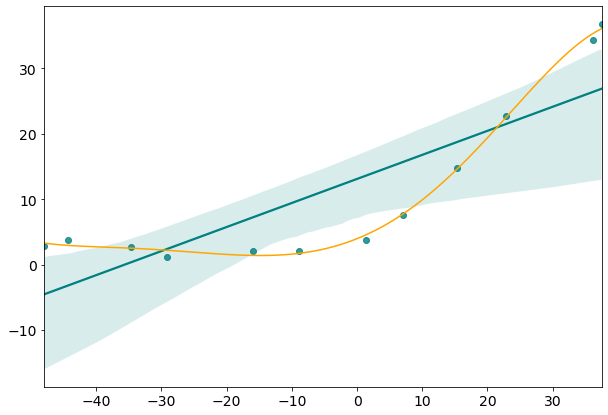

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(X, y, color="teal", ax=ax)
ax.plot(xdomain, y_pred, color='orange')

## Taiwan.CSV

In [ ]:
tw_csv = 'https://dl.dropboxusercontent.com/s/upr5klwy07bba3h/taiwan.csv'
fetch_file_via_requests(tw_csv, data_dir)

'/content/drive/My Drive/adventures/regression/taiwan.csv'

In [ ]:
rdf = pd.read_csv(os.path.join(data_dir, "taiwan.csv"),
        parse_dates=['date'], index_col=['date'])
rdf.tail()

,Taiwan,Local,Imported,Deaths,Recovered,Panshi
date,,,,,,
2020-07-27,462,55,371,7,440,36
2020-07-28,467,55,376,7,440,36
2020-07-29,467,55,376,7,440,36
2020-07-30,467,55,376,7,440,36
2020-07-31,467,55,376,7,440,36


In [ ]:
tdf = pd.DataFrame()
tdf["Active"] = rdf.Taiwan - rdf.Deaths - rdf.Recovered

tdf.tail()

,Active
date,
2020-07-27,15
2020-07-28,20
2020-07-29,20
2020-07-30,20
2020-07-31,20


In [ ]:
xdomain = np.arange(0, len(tdf), 1).reshape(-1, 1)
X, y = xdomain, tdf.Active

for i in [2, 3, 4, 5, 6]:
    _, y_pred, r2 = PolynomialRegression(X, y, i, xdomain)
    tdf['order=%d, r2=%.4f' % (i, r2)] = y_pred

tdf.tail()

,Active,"order=2, r2=0.3730","order=3, r2=0.5030","order=4, r2=0.6436","order=5, r2=0.7643","order=6, r2=0.7908","order=2, $r^2=0.3730$","order=3, $r^2=0.5030$","order=4, $r^2=0.6436$","order=5, $r^2=0.7643$","order=6, $r^2=0.7908$","$order=2, r^2=0.3730$","$order=3, r^2=0.5030$","$order=4, r^2=0.6436$","$order=5, r^2=0.7643$","$order=6, r^2=0.7908$"
date,,,,,,,,,,,,,,,,
2020-07-27,15,-65.292100,-1.176701,58.396634,15.597890,3.418362,-65.292100,-1.176701,58.396634,15.597890,3.418362,-65.292100,-1.176701,58.396634,15.597890,3.418362
2020-07-28,20,-69.156216,-0.145179,68.230892,13.368214,-6.249509,-69.156216,-0.145179,68.230892,13.368214,-6.249509,-69.156216,-0.145179,68.230892,13.368214,-6.249509
2020-07-29,20,-73.058802,0.984663,78.623760,10.663732,-17.365953,-73.058802,0.984663,78.623760,10.663732,-17.365953,-73.058802,0.984663,78.623760,10.663732,-17.365953
2020-07-30,20,-76.999859,2.214304,89.588542,7.451156,-30.032057,-76.999859,2.214304,89.588542,7.451156,-30.032057,-76.999859,2.214304,89.588542,7.451156,-30.032057
2020-07-31,20,-80.979387,3.545223,101.138669,3.696180,-44.352740,-80.979387,3.545223,101.138669,3.696180,-44.352740,-80.979387,3.545223,101.138669,3.696180,-44.352740


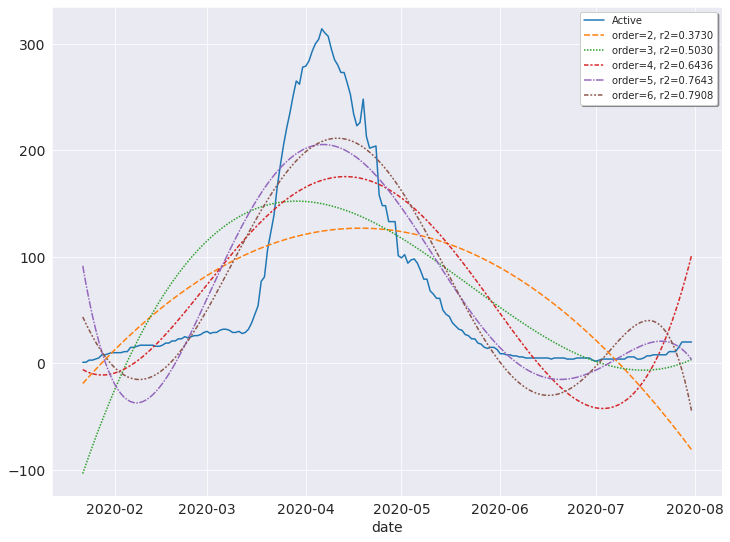

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 9))

sns.lineplot(data=tdf, ax=ax)
ax.legend(shadow=True, facecolor='white', frameon=True)

# 如何繪製學習曲線

- [sklearn plot_learning_curves demo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
- [sklearn learning_curve API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)
- [Learning curve](https://www.ritchieng.com/machinelearning-learning-curve/)

- [Evaluating Learing Algorithm](https://www.ritchieng.com/applying-machine-learning/)
- [Evaluating model performance: Generalization, Bias- Variance tradeoff and overfitting vs. underfitting |Part 2](https://www.intermediait.com/blog/2020/01/12/evaluating-model-performance-generalization-bias-variance-tradeoff-and-overfitting-vs-underfitting-part-2/)
- [YellowBrick LearningCurve](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html)

$ y = 0.5 \times x^2 + x + 2 + randn(100,1)$

In [ ]:
m = 100
X1 = 6 * np.random.rand(m, 1) - 3
X = np.sort(X1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

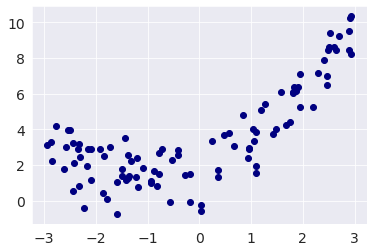

In [ ]:
plt.scatter(X, y, color='navy')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


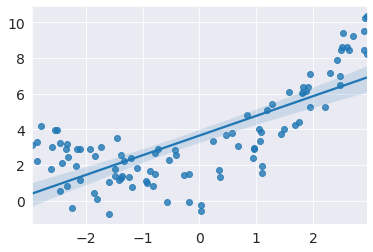

In [ ]:
sns.regplot(X, y)

In [ ]:
def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

ols = simple_ols(X, y)
ols.rsquared

0.5637185970788654

## ## 簡化版 sklearn plot_learning_curves()

- [click here for original version](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [ ]:
from sklearn.model_selection import learning_curve

#
# Simplified version of plot_learning_curves presented in 
#   https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#

def my_plot_learning_curves(model, X, y, cv=None, scoring = None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
       
    fig,ax = plt.subplots(figsize = (10, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, 
                scoring = scoring,
                train_sizes=train_sizes,
                return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

## How to use

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

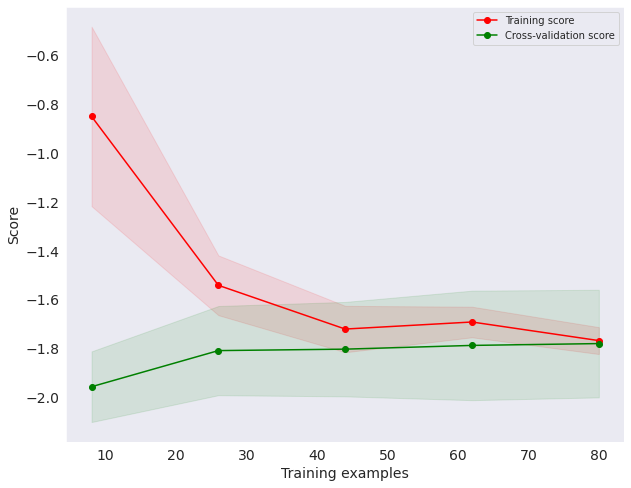

In [ ]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

my_plot_learning_curves(linr, X, y, scoring="neg_root_mean_squared_error")

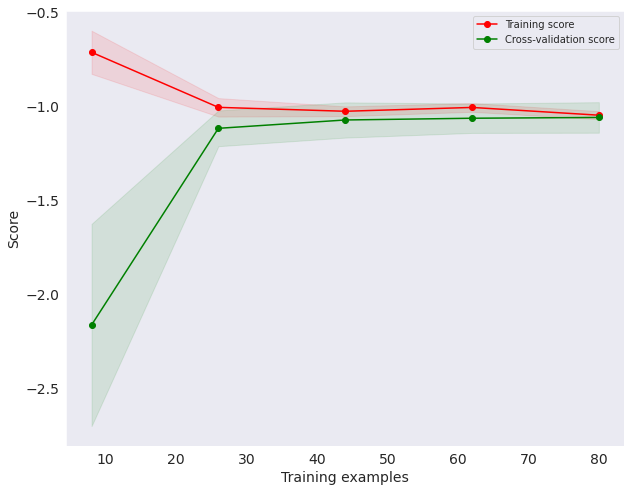

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

model = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

my_plot_learning_curves(model, X, y, scoring='neg_root_mean_squared_error')

In [ ]:
for x in sklearn.metrics.SCORERS.keys():
    print(x)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


## DIY considerations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def learning_curve_data(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    return train_errors, test_errors

def reg_lr_curve(model, X, y):
    train, val = learning_curve_data(model, X, y)

    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(range(len(train)), -np.sqrt(train), ax=ax, color='brown')
    sns.lineplot(range(len(train)), -np.sqrt(val), ax=ax)
    ax.legend(
        ['Train Error', 'Validation Error'],
        shadow=True, frameon=True, fontsize=14, facecolor='white'
    )
    ax.set_ylabel('-RMSE')
    ax.set_xlabel('Training size')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


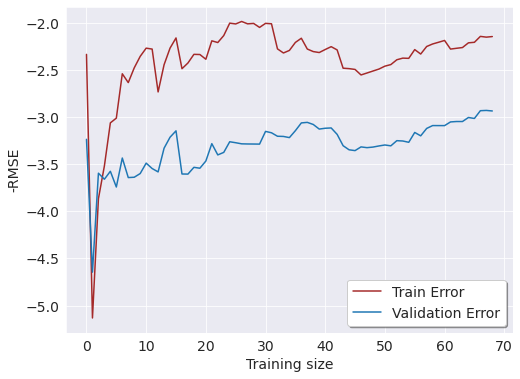

In [ ]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

reg_lr_curve(linr, X, y)

# Regularized Models

$y = 1 + 0.5 \times \frac{randn(20,1)}{1.5}$

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin = LinearRegression()
lin.fit(X, y)
yhat = lin.predict(X)
mse = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)
r2, mse

(0.25845207303751283, 0.3446263664309721)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

## Ridge

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


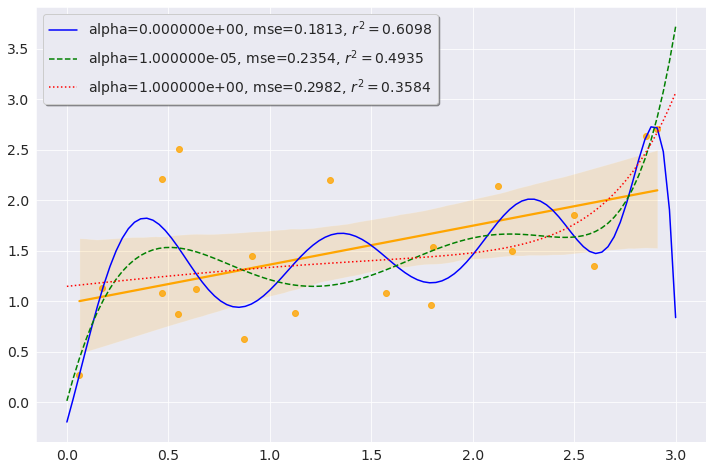

In [ ]:
alphas = [0, 1e-5, 1]
styles=['b-', 'g--', 'r:']
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.regplot(X, y, color='orange')

for alpha_value, line_style in zip(alphas, styles):
    #model = Ridge(alpha_value)
    model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        Ridge(alpha_value)
    )
    model.fit(X, y)
    yline = model.predict(X_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(X_new, yline, line_style, label='alpha=%e, ' % alpha_value + 'mse=%.4f, ' % mse
            + r'$r^2=%.4f$' % r2)
ax.legend(loc='upper left', fancybox=True, shadow=True, frameon=True, fontsize=14)

## Lasso